Top 10 similar users to User 1: [773, 868, 592, 880, 429, 276, 916, 222, 457, 8]
Predicted rating for item 508 by user 1: 4.2


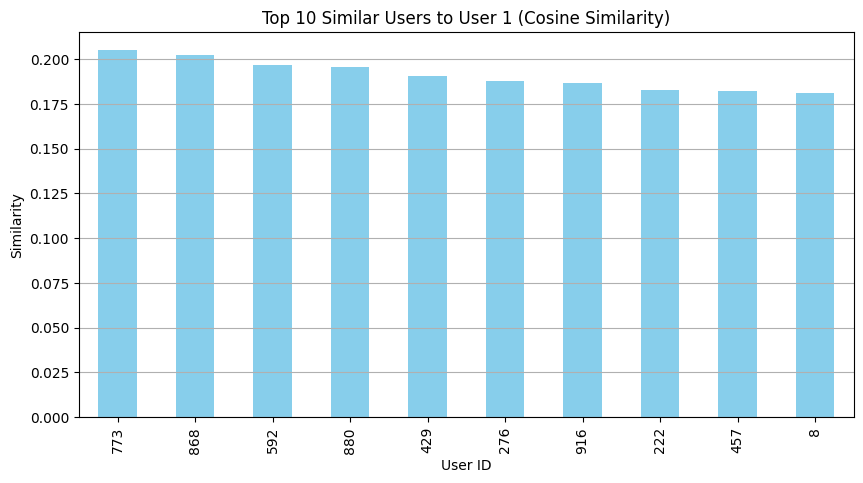

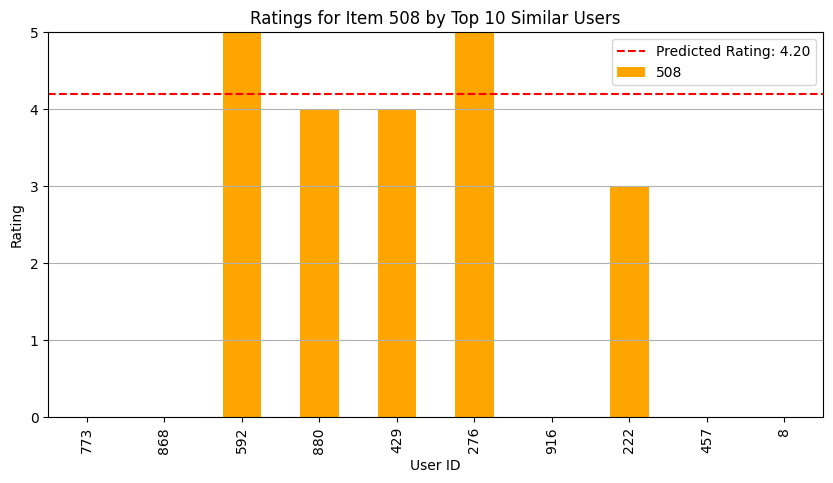

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load rating data
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

# Create a user-item rating matrix
utility_matrix = ratings.pivot_table(index="user_id", columns="item_id", values="rating")

# Centralize user ratings
centered_matrix = utility_matrix.sub(utility_matrix.mean(axis=1), axis=0).fillna(0)

# Problem 1
cos_sim = cosine_similarity(centered_matrix)
sim_df = pd.DataFrame(cos_sim, index=utility_matrix.index, columns=utility_matrix.index)

top10_users = sim_df.loc[1].drop(1).nlargest(10).index
item_508_ratings = utility_matrix.loc[top10_users, 508]
predicted_rating = item_508_ratings.mean()

print("Top 10 similar users to User 1:", top10_users.tolist())
print("Predicted rating for item 508 by user 1:", round(predicted_rating, 2))

similarities = sim_df.loc[1, top10_users]
plt.figure(figsize=(10, 5))
similarities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Similar Users to User 1 (Cosine Similarity)")
plt.ylabel("Similarity")
plt.xlabel("User ID")
plt.grid(axis='y')
plt.show()
plt.figure(figsize=(10, 5))
item_508_ratings.plot(kind='bar', color='orange')
plt.title("Ratings for Item 508 by Top 10 Similar Users")
plt.ylabel("Rating")
plt.xlabel("User ID")
plt.ylim(0, 5)
plt.axhline(predicted_rating, color='red', linestyle='--', label=f'Predicted Rating: {predicted_rating:.2f}')
plt.legend()
plt.grid(axis='y')
plt.show()




 Problem 2
User 15 Genre similarity to movie 95: 0.2152
User 200 Genre similarity to movie 95: 0.3875
Results: Movie 95 is more suitable User 200


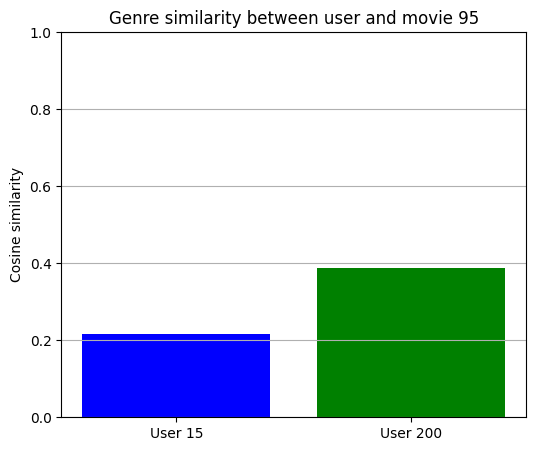

In [2]:
# Problem 2

# Load movie data
movies = pd.read_csv(
    "ml-100k/u.item", 
    sep="|", 
    encoding="latin-1", 
    header=None,
    names=[
        "item_id", "title", "release_date", "video_release_date", "IMDb_URL",
        *[f"genre_{i}" for i in range(19)]  
    ]
)

# Calculate user's type preference
def get_user_genre_preference(user_id):
    user_ratings = ratings[ratings["user_id"] == user_id]
    merged = pd.merge(
        user_ratings, 
        movies, 
        left_on="item_id", 
        right_on="item_id"  
    )
    genre_cols = [f"genre_{i}" for i in range(19)]
    pref = (merged[genre_cols].T * merged["rating"]).mean(axis=1)
    return pref.fillna(0).values

# Get user preference and movie type vector
user15_pref = get_user_genre_preference(15)
user200_pref = get_user_genre_preference(200)
movie95_genre = movies[movies["item_id"] == 95].iloc[:, 5:24].values.flatten()

# Calculate cosine similarity
sim_15 = cosine_similarity([user15_pref], [movie95_genre])[0][0]
sim_200 = cosine_similarity([user200_pref], [movie95_genre])[0][0]
suggested_user = 15 if sim_15 > sim_200 else 200

print("\n Problem 2")
print(f"User 15 Genre similarity to movie 95: {sim_15:.4f}")
print(f"User 200 Genre similarity to movie 95: {sim_200:.4f}")
print(f"Results: Movie 95 is more suitable User {suggested_user}")

plt.figure(figsize=(6, 5))
plt.bar(["User 15", "User 200"], [sim_15, sim_200], color=["blue", "green"])
plt.title("Genre similarity between user and movie 95")
plt.ylabel("Cosine similarity")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()